
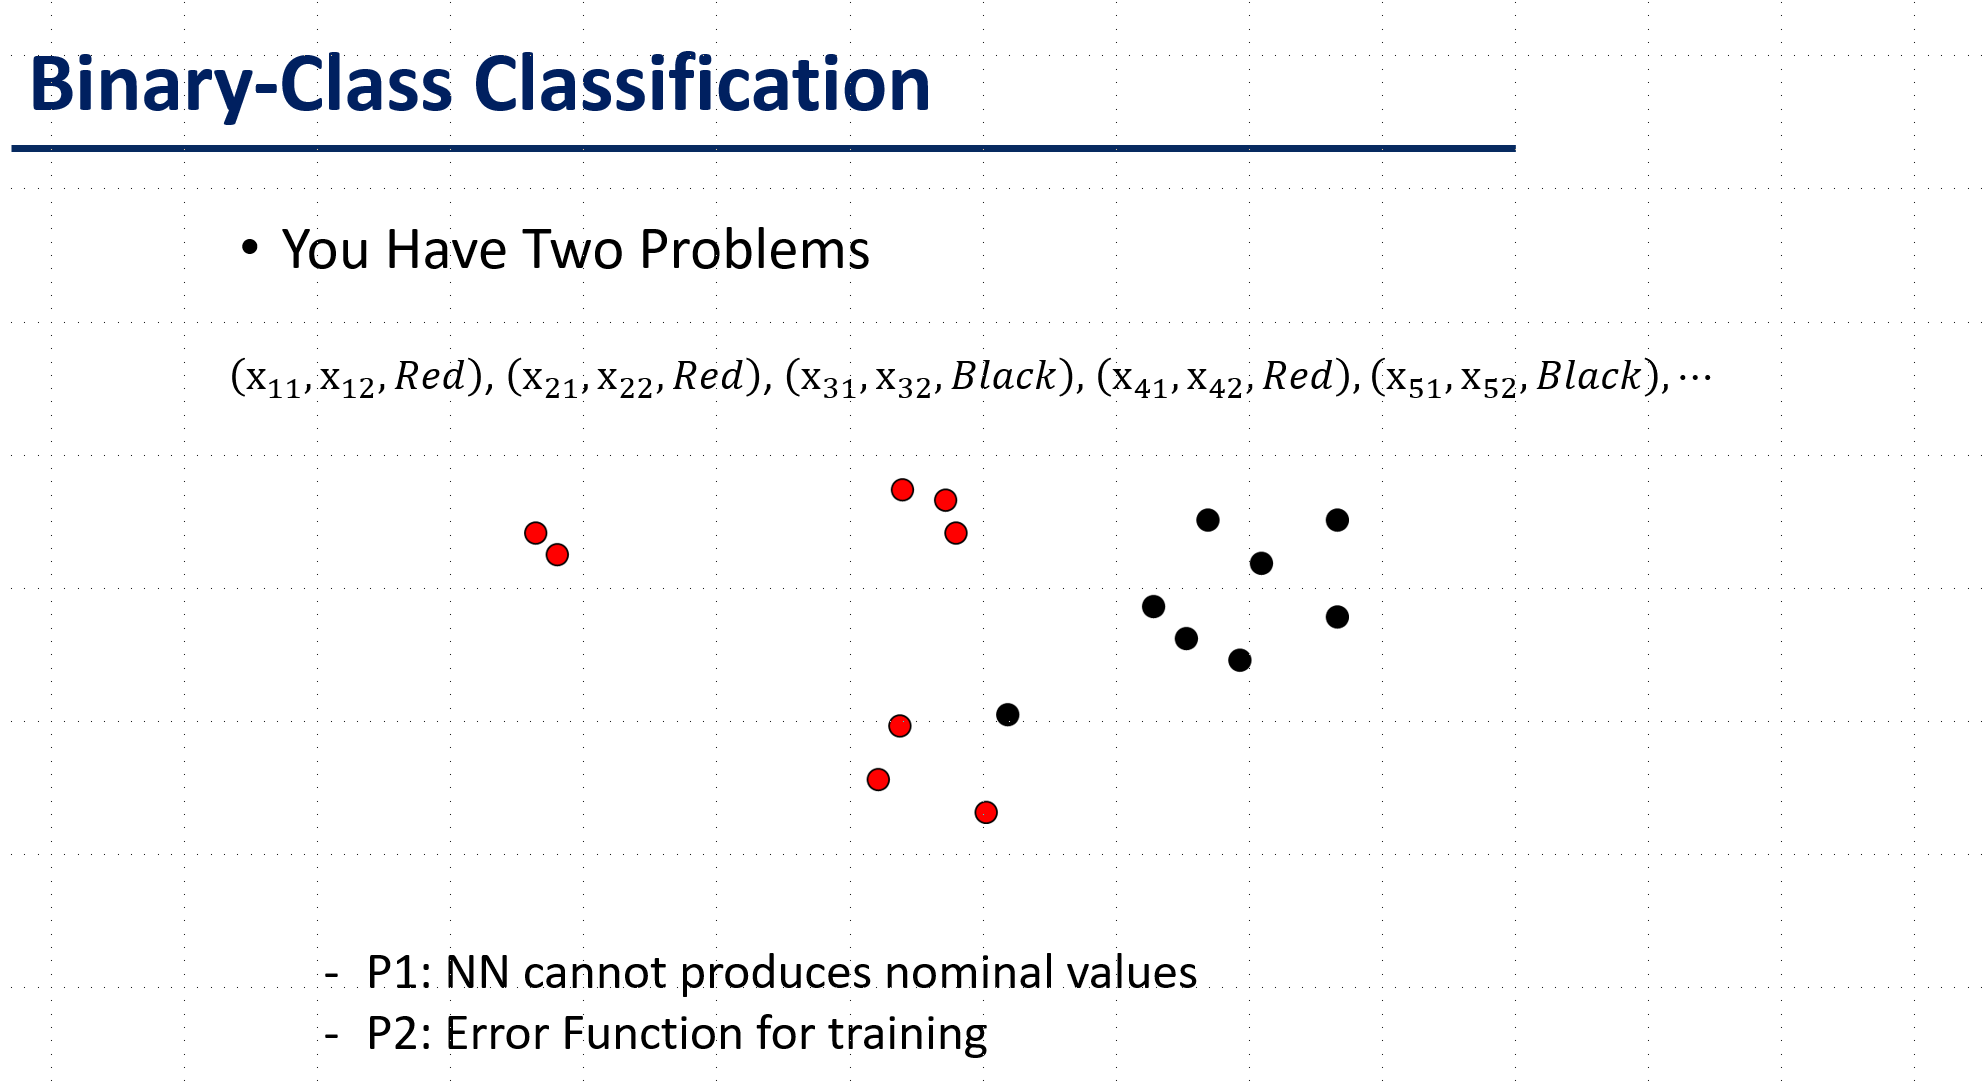



In [ ]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[0,0],[1,1],[1,0],[0,1]],
                              shuffle=True, cluster_std=0.15)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[0,0],[1,1],[1,0],[0,1]],
                            shuffle=True, cluster_std=0.15)

In [ ]:
for i, x in enumerate(x_train):
    print(x, y_train[i])
    if i == 15 : break

[0.01295588 0.02644276] 0
[-0.03273963 -0.12682819] 0
[0.15384758 0.93254099] 3
[-0.25507016  0.20641206] 0
[-0.03067054  0.04828604] 0
[1.0612172  1.14284481] 1
[0.83872017 0.93783336] 1
[1.15670878 0.78114017] 1
[1.07583491 1.05021754] 1
[-0.26308169  0.14108438] 0
[0.03711467 1.13493431] 3
[-0.20948757  1.05256178] 3
[ 0.83982552 -0.36603476] 2
[-0.05715441 -0.39524452] 0
[ 0.98433171 -0.10780895] 2
[0.80808065 0.90349481] 1


In [ ]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

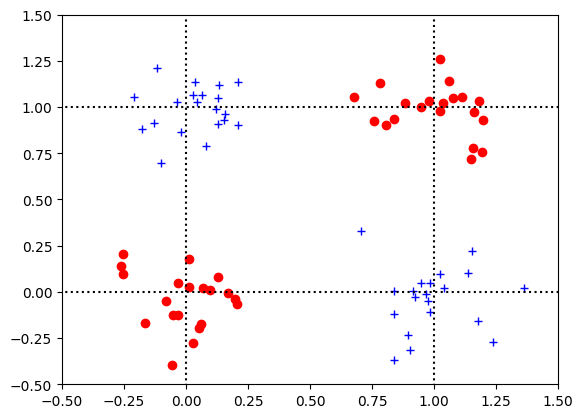

In [ ]:
def vis_data(x, y=None):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor='k')
        elif y_ == 0:
            plt.plot(x_[0], x_[1], 'ro')
        else:
            plt.plot(x_[0], x_[1], 'b+')  #

plt.figure()
vis_data(x_train, y_train)
plt.plot([-1, 2], [0,0], linestyle = ":", color = 'k')
plt.plot([-1, 2], [1,1], linestyle = ":", color = 'k')
plt.plot([0, 0], [-1, 2], linestyle = ":", color = 'k')
plt.plot([1, 1], [-1,2], linestyle = ":", color = 'k')

plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.show()

In [ ]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


layer 1 : input_size x hidden_size, sigmoid

layer 2 : hidden_size x output_size, sigmoid

# Practice 1
- Check Make Neural Network and Loss.
- Change the number of hidden layers to 2, 3, 4, and 5, and observe the loss.

In [ ]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            # TODO: Fill in here

        def forward(self, input_tensor):
            # TODO: Fill in here

            return output

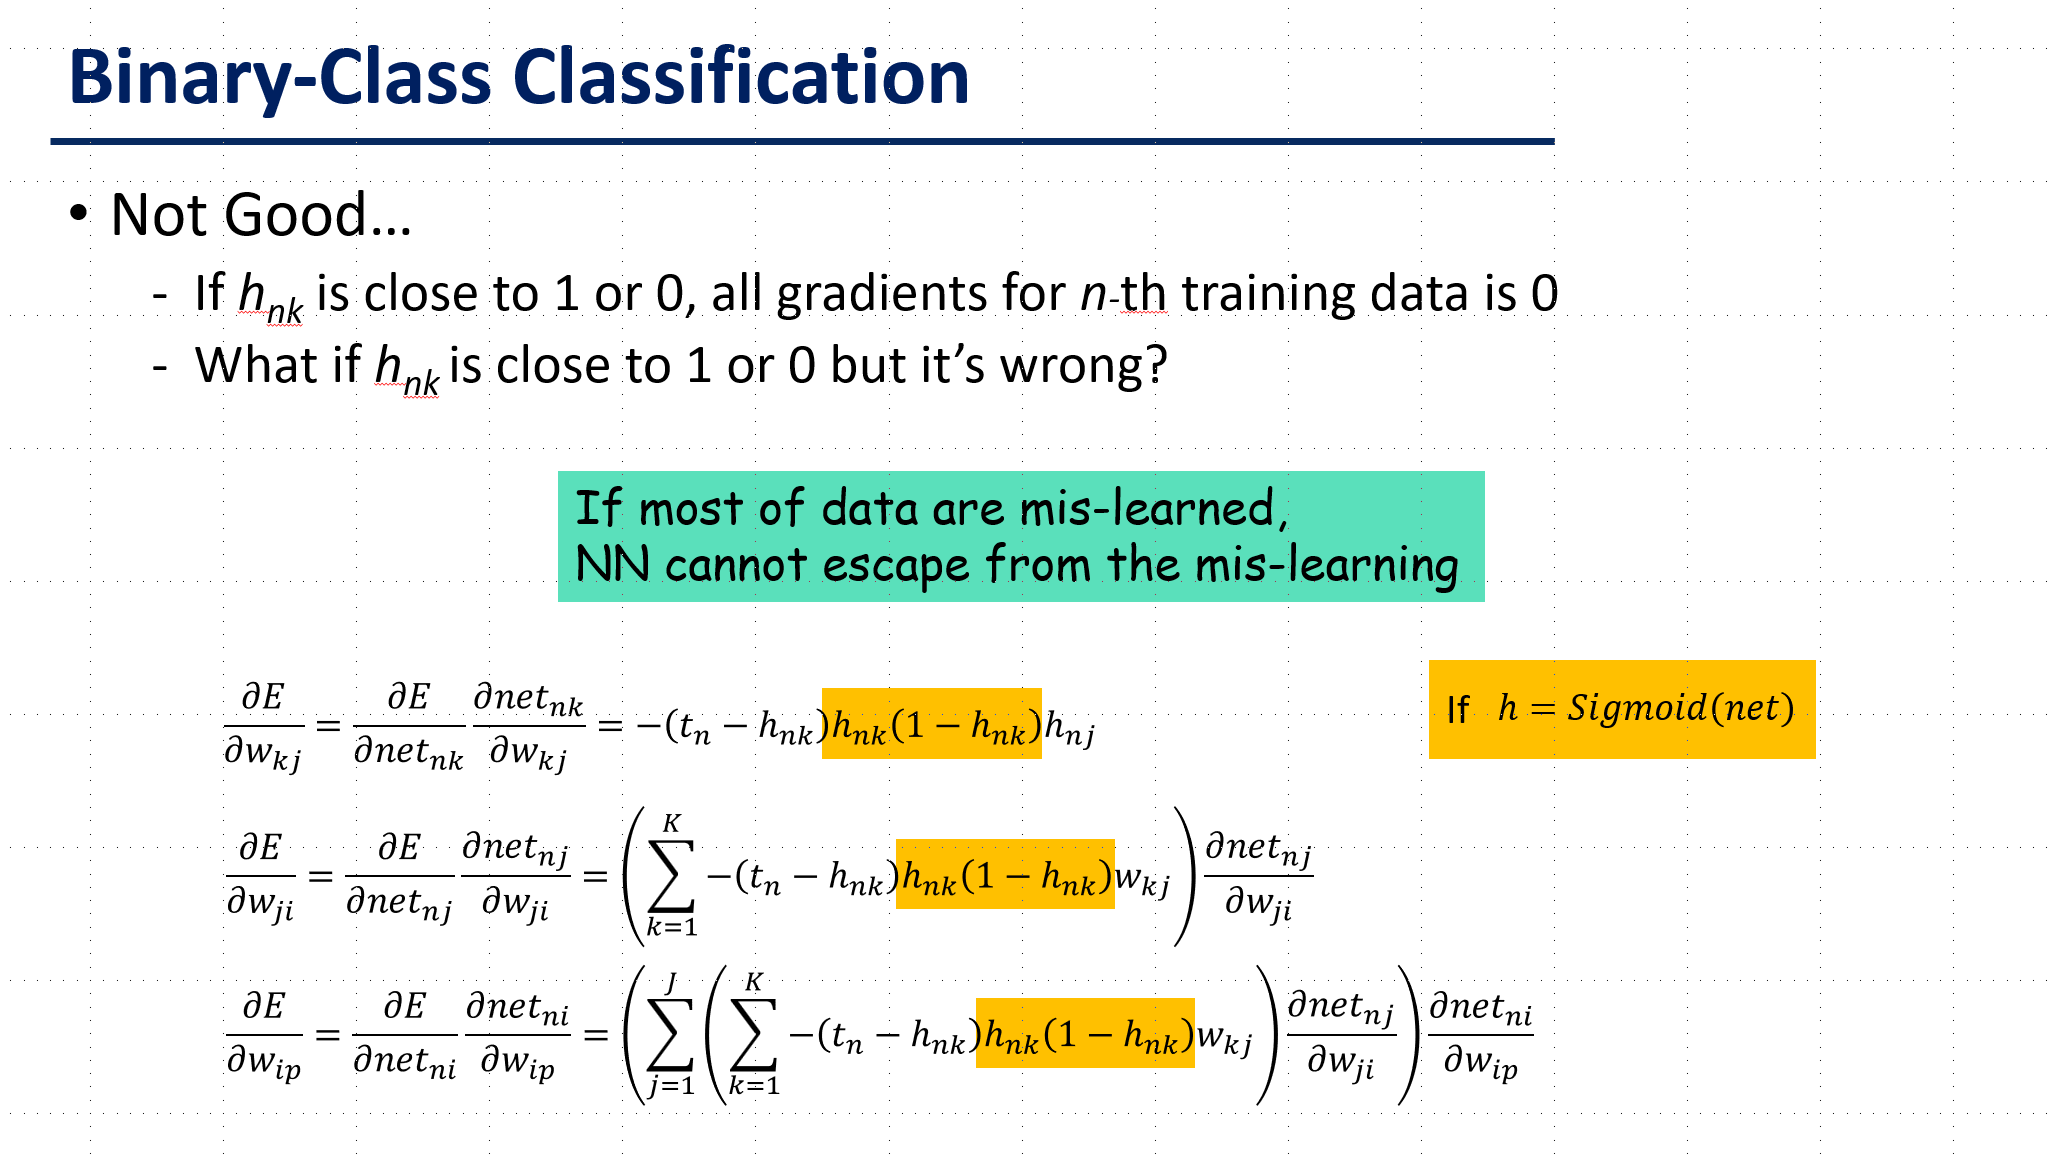

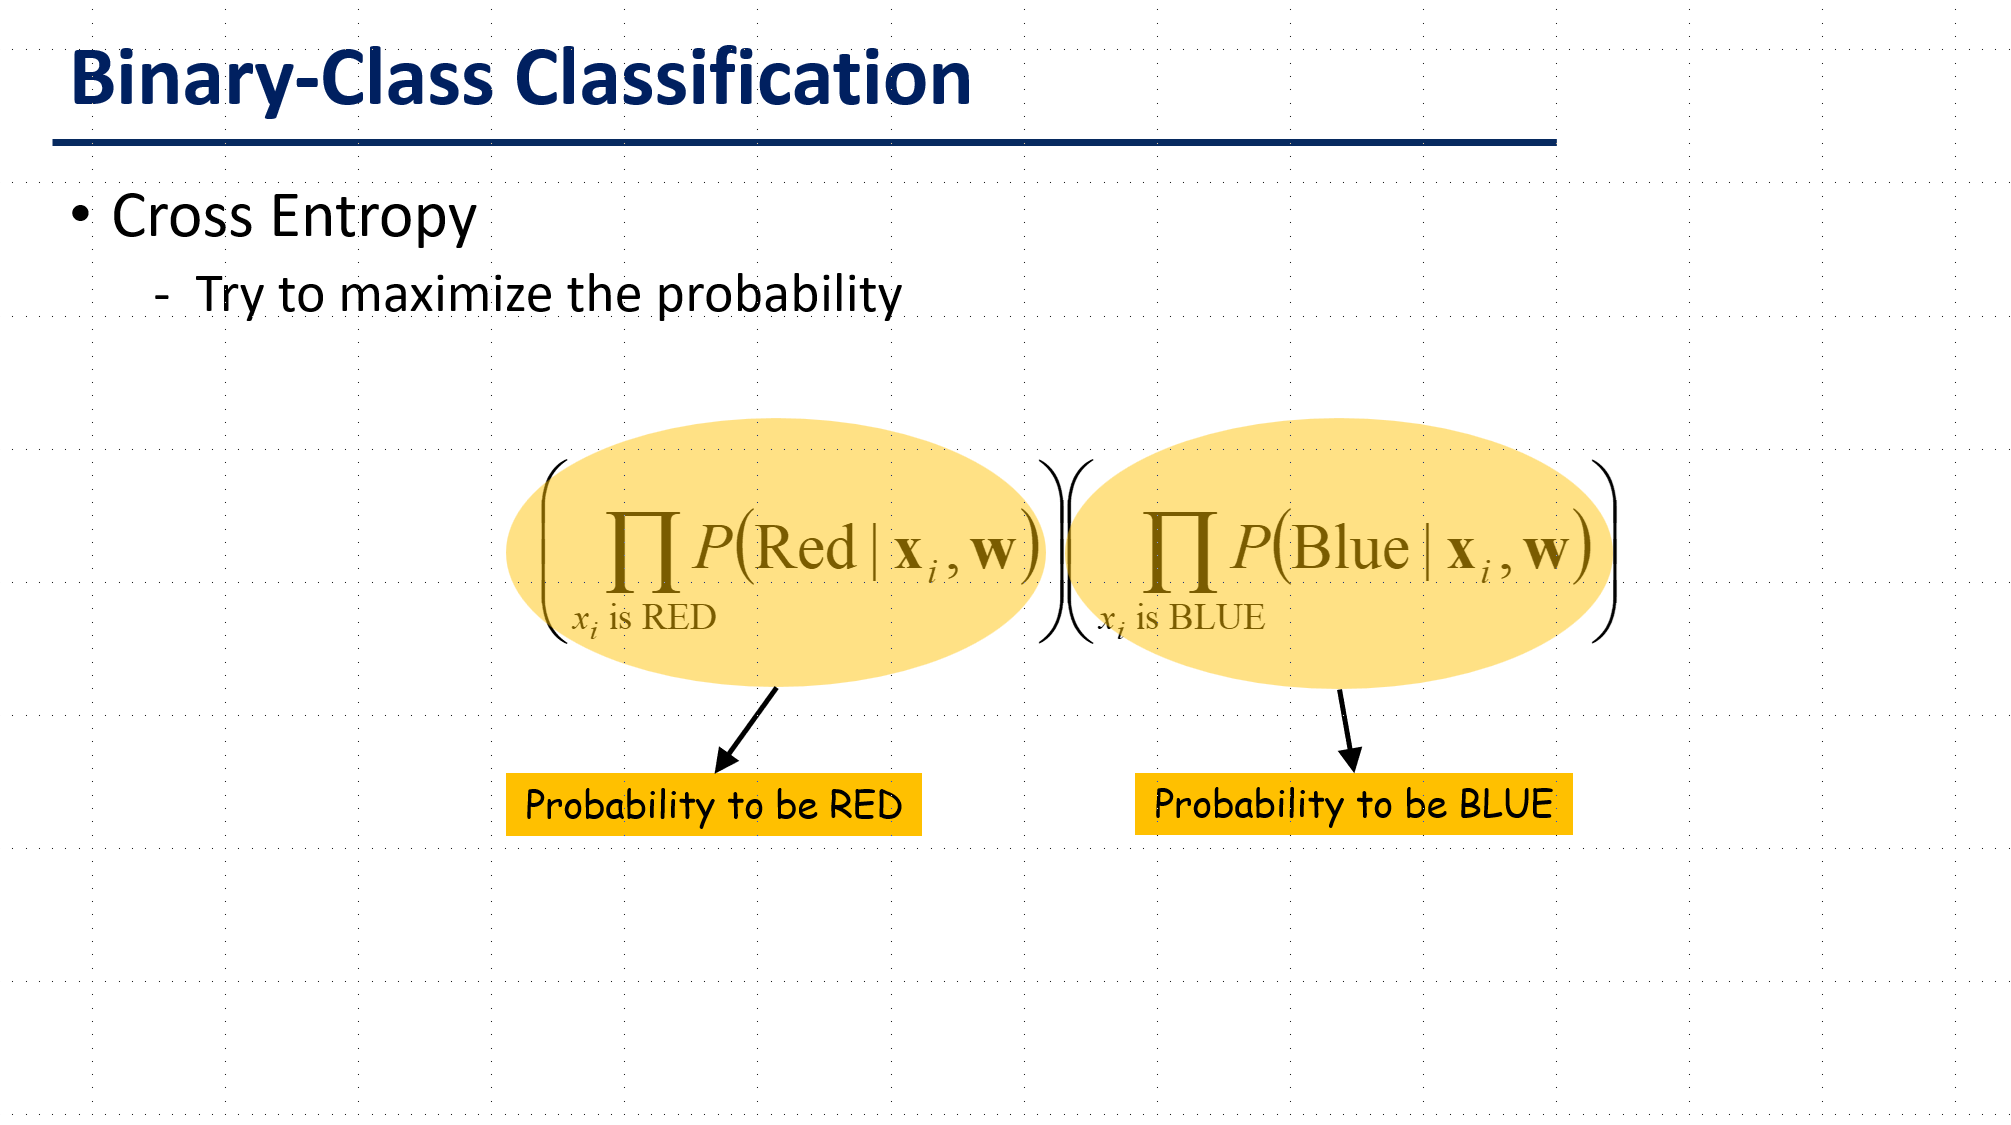

# Practice 2
- Change the loss function and observe the loss.

In [ ]:
model = NeuralNet(2, 5)
criterion = torch.nn.MSELoss() # torch.nn.BCELoss()

# Practice 3
- Change the optimizer and observe the loss.

In [ ]:
# Change Optimizer (Momentum, Adagrad, RMSprop, Adam)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1) # https://pytorch.org/docs/stable/optim.html

In [ ]:
for a in model.parameters():
    print(a)

In [ ]:
for a in model.parameters():
    print(a.grad)

In [ ]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.24895977973937988


In [ ]:
model.train()
optimizer.zero_grad()
train_output = model(x_train)
train_loss = criterion(train_output.squeeze(), y_train)
train_loss.backward()
optimizer.step()

In [ ]:
epochs = 2000

In [ ]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
        torch.save(model.state_dict(), './model_epoch{}.pt'.format(epoch))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.24924369156360626
Train loss at 100 is 0.24118764698505402
Train loss at 200 is 0.22523561120033264
Train loss at 300 is 0.203241229057312
Train loss at 400 is 0.17588460445404053
Train loss at 500 is 0.14700065553188324
Train loss at 600 is 0.11991535127162933
Train loss at 700 is 0.0963384136557579
Train loss at 800 is 0.07715893536806107
Train loss at 900 is 0.06227103993296623
Train loss at 1000 is 0.05087730288505554
Train loss at 1100 is 0.042186539620161057
Train loss at 1200 is 0.03554892539978027
Train loss at 1300 is 0.030418703332543373
Train loss at 1400 is 0.026384655386209488
Train loss at 1500 is 0.02315281145274639
Train loss at 1600 is 0.02052784338593483
Train loss at 1700 is 0.018364908173680305
Train loss at 1800 is 0.016560200601816177
Train loss at 1900 is 0.015036377124488354


In [ ]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.010548855178058147


The Need for Saving a Model

In [ ]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 2.0199,  1.2296],
        [-0.8590, -1.2107],
        [ 1.5961, -1.5337],
        [-0.2003,  0.3395],
        [-1.0941, -1.5456]])), ('linear_1.bias', tensor([-1.5088,  0.9524, -0.2304, -0.4734,  1.2151])), ('linear_2.weight', tensor([[-2.6804, -1.7162,  2.1488,  0.4344, -2.2215]])), ('linear_2.bias', tensor([1.7726]))])


In [ ]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('The probability that the vector [0, 1] has label 1 is {}.'.format\
      (new_model(torch.FloatTensor([0,1])).item()))

벡터 [0, 1]이 레이블 1을 가질 확률은 0.8547810912132263


In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round((y_pred)).squeeze()

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)

    return acc

In [ ]:
new_model.eval()
print(torch.round(new_model(x_test)).squeeze())
print(y_test)
print(binary_acc(new_model(x_test), y_test))

tensor([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0.], grad_fn=<SqueezeBackward0>)
tensor([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0.])
tensor(100.)


In [ ]:
for i in range(0,2000,100):
    new_model = NeuralNet(2, 5)
    new_model.load_state_dict(torch.load('./model_epoch{}.pt'.format(i)))
    new_model.eval()
    print("======epoch : {} =======".format(i))
    print(binary_acc(new_model(x_test), y_test))

======epoch : 0 =======
tensor(45.)
======epoch : 100 =======
tensor(55.)
======epoch : 200 =======
tensor(75.)
======epoch : 300 =======
tensor(75.)
======epoch : 400 =======
tensor(85.)
======epoch : 500 =======
tensor(100.)
======epoch : 600 =======
tensor(100.)
======epoch : 700 =======
tensor(100.)
======epoch : 800 =======
tensor(100.)
======epoch : 900 =======
tensor(100.)
======epoch : 1000 =======
tensor(100.)
======epoch : 1100 =======
tensor(100.)
======epoch : 1200 =======
tensor(100.)
======epoch : 1300 =======
tensor(100.)
======epoch : 1400 =======
tensor(100.)
======epoch : 1500 =======
tensor(100.)
======epoch : 1600 =======
tensor(100.)
======epoch : 1700 =======
tensor(100.)
======epoch : 1800 =======
tensor(100.)
======epoch : 1900 =======
tensor(100.)
